# Scaling Numeric Data - Exercises
---

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

import os
from env import host, user, password

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

import wrangle as w

In [2]:
train, validate, test = w.wrangle_zillow()

In [3]:
train.shape, validate.shape, test.shape

((1292904, 7), (323226, 7), (179570, 7))

**Min-Max Scaler**

In [4]:
train

,bed,bath,sqft,prop_value,year,prop_tax,zip
643196,3,1.5,1164.0,313006.0,1954,3848.42,06059
1945521,3,1.5,1088.0,300950.0,1959,3583.84,06059
1097096,3,4.5,3245.0,794619.0,1989,9456.30,06059
712393,2,1.0,1836.0,310189.0,1948,3934.34,06037
848788,3,2.0,1428.0,467763.0,1971,5510.68,06059
...,...,...,...,...,...,...,...
1721256,3,2.0,2052.0,134912.0,1965,1689.74,06059
185170,5,3.0,3146.0,726077.0,1970,8923.14,06037
372902,3,1.0,988.0,177480.0,1952,2283.86,06037
1993224,3,3.0,1830.0,123906.0,1950,1618.82,06037


In [5]:
# 1. create the object
mm_scaler = sklearn.preprocessing.MinMaxScaler()

# 2. fit the object (learn the min and max value)
mm_scaler.fit(train)

# 3. use the object (use the min, max to do the transformation)
scaled_zillow = mm_scaler.transform(train)
scaled_zillow[:10]

array([[0.33333333, 0.25      , 0.33680857, 0.32761941, 0.42857143,
        0.37074225, 0.2972973 ],
       [0.33333333, 0.25      , 0.31479873, 0.31499967, 0.48351648,
        0.34514399, 0.2972973 ],
       [0.33333333, 1.        , 0.93947292, 0.83175307, 0.81318681,
        0.91330765, 0.2972973 ],
       [0.        , 0.125     , 0.53142195, 0.32467069, 0.36263736,
        0.37905506, 0.        ],
       [0.33333333, 0.375     , 0.41326383, 0.48961299, 0.61538462,
        0.5315668 , 0.2972973 ],
       [0.66666667, 0.625     , 0.65913698, 0.43887754, 0.54945055,
        0.5132316 , 0.        ],
       [0.33333333, 0.125     , 0.29510571, 0.03826749, 0.3956044 ,
        0.06801563, 0.        ],
       [0.66666667, 0.375     , 0.46191717, 0.08093555, 0.6043956 ,
        0.10516396, 0.2972973 ],
       [0.66666667, 0.375     , 0.51057052, 0.05993858, 0.37362637,
        0.08656948, 0.        ],
       [0.66666667, 0.625     , 0.52852592, 0.39197218, 0.79120879,
        0.45282347, 0.2

In [6]:
train.head()

,bed,bath,sqft,prop_value,year,prop_tax,zip
643196,3,1.5,1164.0,313006.0,1954,3848.42,06059
1945521,3,1.5,1088.0,300950.0,1959,3583.84,06059
1097096,3,4.5,3245.0,794619.0,1989,9456.30,06059
712393,2,1.0,1836.0,310189.0,1948,3934.34,06037
848788,3,2.0,1428.0,467763.0,1971,5510.68,06059


In [7]:
minmax_train = train.copy()
minmax_validate = validate.copy()
minmax_test = test.copy()

# assign the scaled values as new columns in the train
minmax_train[['bed_scaled', 'bath_scaled', 'sqft_scaled', 'tot_value_scaled', 'year_scaled', 'prop_tax_scaled', 'zip_scaled']] = scaled_zillow

In [8]:
minmax_train

,bed,bath,sqft,prop_value,year,prop_tax,zip,bed_scaled,bath_scaled,sqft_scaled,tot_value_scaled,year_scaled,prop_tax_scaled,zip_scaled
643196,3,1.5,1164.0,313006.0,1954,3848.42,06059,0.333333,0.250,0.336809,0.327619,0.428571,0.370742,0.297297
1945521,3,1.5,1088.0,300950.0,1959,3583.84,06059,0.333333,0.250,0.314799,0.315000,0.483516,0.345144,0.297297
1097096,3,4.5,3245.0,794619.0,1989,9456.30,06059,0.333333,1.000,0.939473,0.831753,0.813187,0.913308,0.297297
712393,2,1.0,1836.0,310189.0,1948,3934.34,06037,0.000000,0.125,0.531422,0.324671,0.362637,0.379055,0.000000
848788,3,2.0,1428.0,467763.0,1971,5510.68,06059,0.333333,0.375,0.413264,0.489613,0.615385,0.531567,0.297297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721256,3,2.0,2052.0,134912.0,1965,1689.74,06059,0.333333,0.375,0.593976,0.141198,0.549451,0.161889,0.297297
185170,5,3.0,3146.0,726077.0,1970,8923.14,06037,1.000000,0.625,0.910802,0.760006,0.604396,0.861724,0.000000
372902,3,1.0,988.0,177480.0,1952,2283.86,06037,0.333333,0.125,0.285838,0.185756,0.406593,0.219370,0.000000
1993224,3,3.0,1830.0,123906.0,1950,1618.82,06037,0.333333,0.625,0.529684,0.129677,0.384615,0.155027,0.000000


In [9]:
# make new scaled columns for validate and test (transform only)

minmax_test[['bed_scaled', 'bath_scaled', 'sqft_scaled', 'tot_value_scaled', 'year_scaled', 'prop_tax_scaled', 'zip_scaled']] = mm_scaler.transform(test)
minmax_validate[['bed_scaled', 'bath_scaled', 'sqft_scaled', 'tot_value_scaled', 'year_scaled', 'prop_tax_scaled', 'zip_scaled']] = mm_scaler.transform(validate)

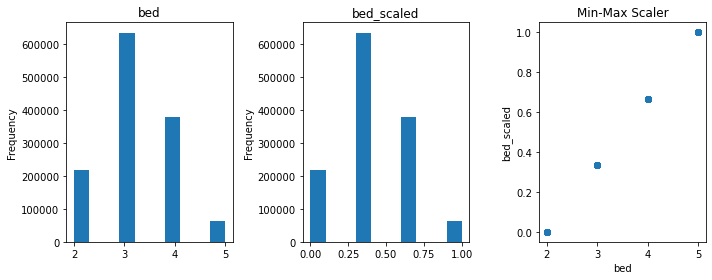

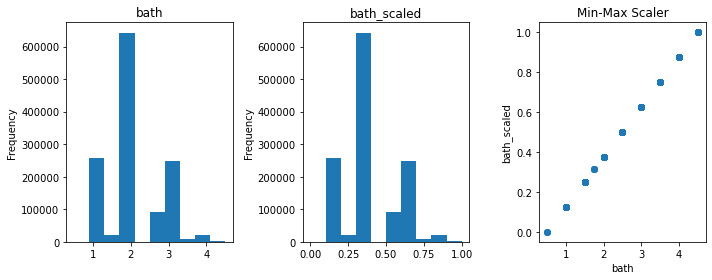

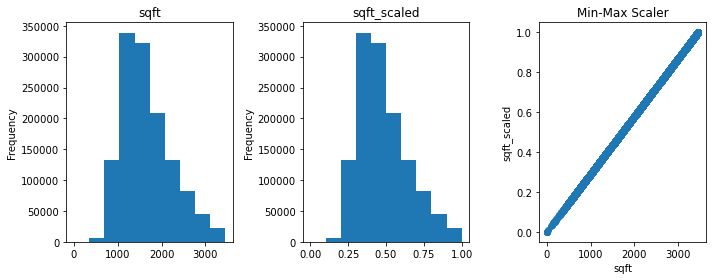

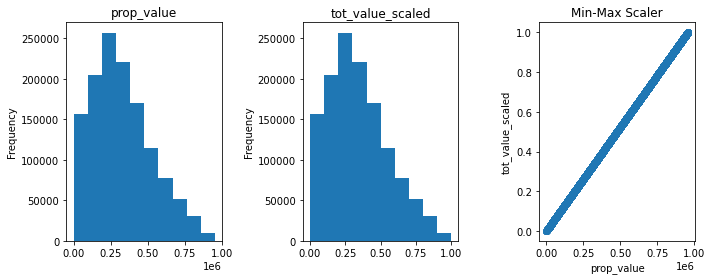

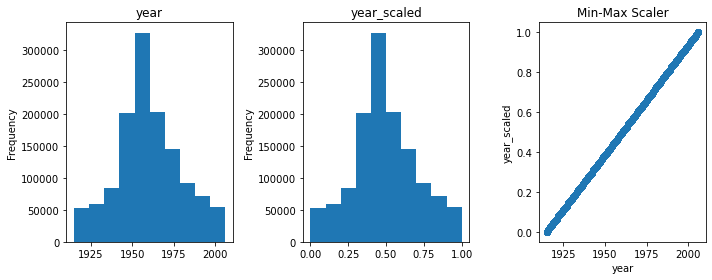

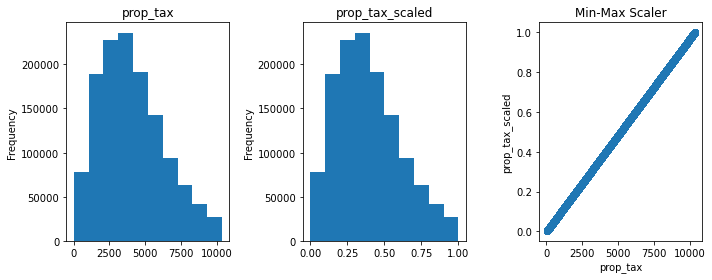

In [10]:
for i in np.arange((len(minmax_train.drop(columns=['zip','zip_scaled']).columns))* 0.5):
    x = minmax_train.columns[i]
    y = minmax_train.columns[i + (len(minmax_train.columns)* 0.5)]

    # Visualize the un-scaled and scaled distribution for all columns
    plt.figure(figsize=(10, 4))

    
    # subplot 1
    plt.subplot(131)
    minmax_train[x].plot.hist(title=x)

    #subplot 2
    plt.subplot(132)
    minmax_train[y].plot.hist(title=y)
    
    # Visualize the scaling:
    plt.subplot(133)
    plt.scatter(minmax_train[x], minmax_train[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Min-Max Scaler')
    plt.tight_layout()

**Standard Scaler**

In [11]:
std_train = train.copy()
std_validate = validate.copy()
std_test = test.copy()

In [12]:
# 1. create the object
std_scaler = sklearn.preprocessing.StandardScaler()

# 2. fit the object
std_scaler.fit(train)

# 3. use the object. Scale total_bill only
std_train[['bed_scaled', 'bath_scaled', 'sqft_scaled', 'tot_value_scaled', 'year_scaled', 'prop_tax_scaled', 'zip_scaled']] = std_scaler.transform(train)
std_test[['bed_scaled', 'bath_scaled', 'sqft_scaled', 'tot_value_scaled', 'year_scaled', 'prop_tax_scaled', 'zip_scaled']] = std_scaler.transform(test)
std_validate[['bed_scaled', 'bath_scaled', 'sqft_scaled', 'tot_value_scaled', 'year_scaled', 'prop_tax_scaled', 'zip_scaled']] = std_scaler.transform(validate)

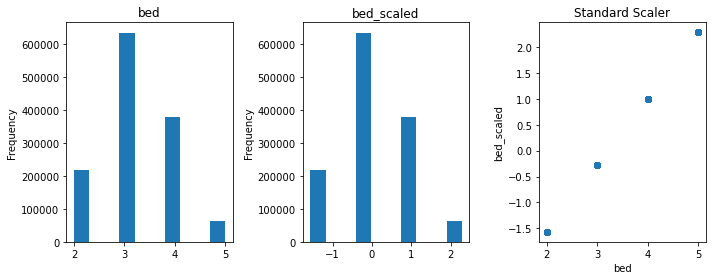

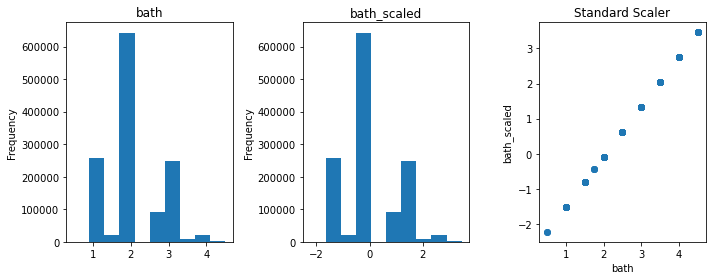

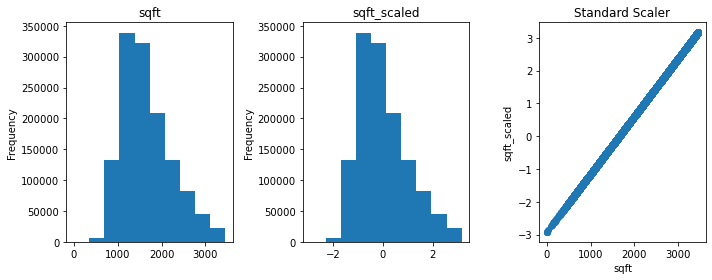

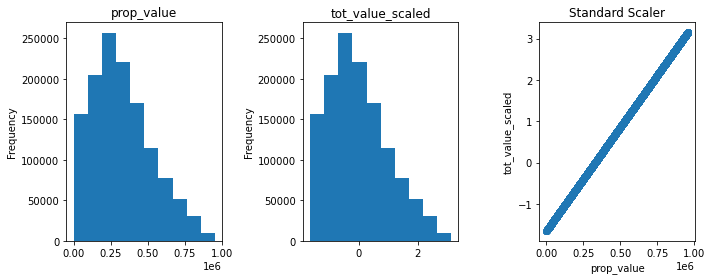

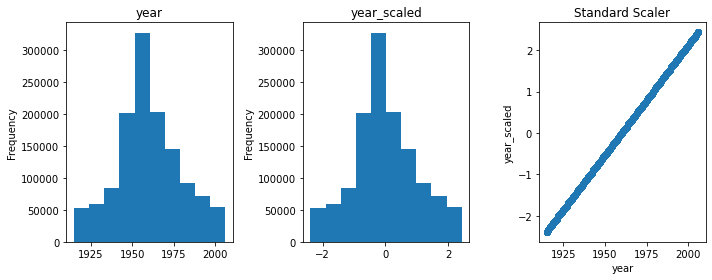

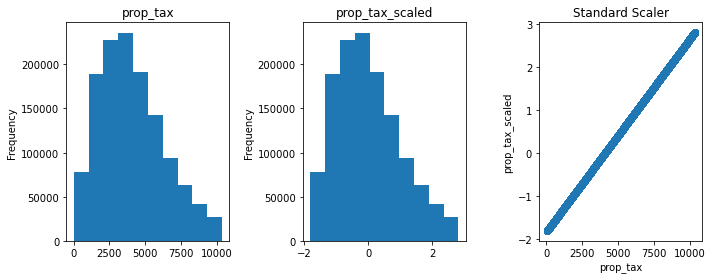

In [13]:
for i in np.arange((len(std_train.drop(columns=['zip','zip_scaled']).columns))* 0.5):
    x = std_train.columns[i]
    y = std_train.columns[i + (len(std_train.columns)* 0.5)]

    # Visualize the un-scaled and scaled distribution for all columns
    plt.figure(figsize=(10, 4))

    
    # subplot 1
    plt.subplot(131)
    std_train[x].plot.hist(title=x)

    #subplot 2
    plt.subplot(132)
    std_train[y].plot.hist(title=y)
    
    # Visualize the scaling:
    plt.subplot(133)
    plt.scatter(std_train[x], std_train[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Standard Scaler')
    plt.tight_layout()

**Robust Scaler**

In [14]:
rob_train = train.copy()
rob_validate = validate.copy()
rob_test = test.copy()

In [15]:
# 1. create the object
rob_scaler = sklearn.preprocessing.RobustScaler()

# 2. fit the object
rob_scaler.fit(train)

# 3. use the object
rob_train[['bed_scaled', 'bath_scaled', 'sqft_scaled', 'tot_value_scaled', 'year_scaled', 'prop_tax_scaled', 'zip_scaled']] = rob_scaler.transform(train)
rob_test[['bed_scaled', 'bath_scaled', 'sqft_scaled', 'tot_value_scaled', 'year_scaled', 'prop_tax_scaled', 'zip_scaled']] = rob_scaler.transform(test)
rob_validate[['bed_scaled', 'bath_scaled', 'sqft_scaled', 'tot_value_scaled', 'year_scaled', 'prop_tax_scaled', 'zip_scaled']] = rob_scaler.transform(validate)

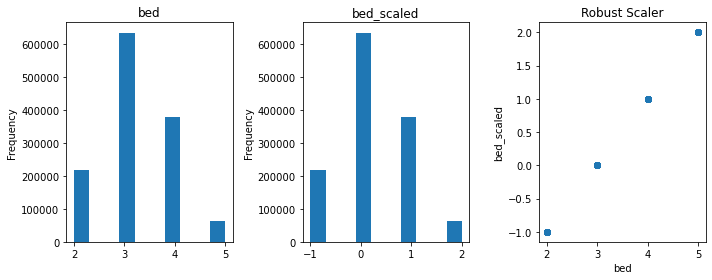

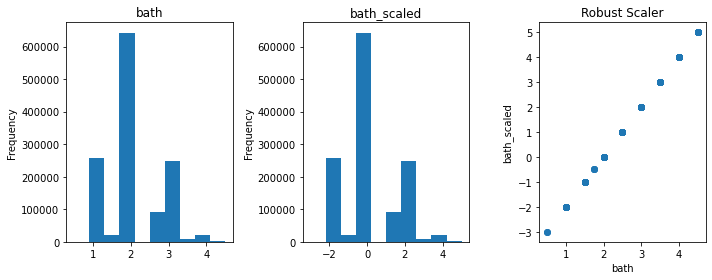

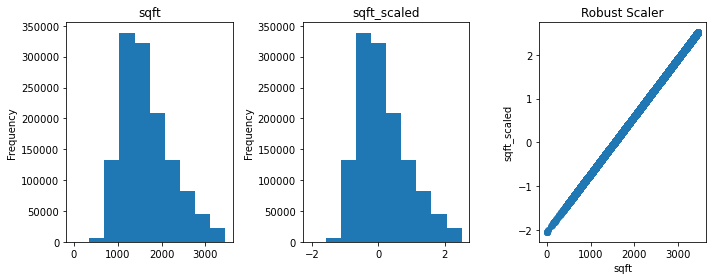

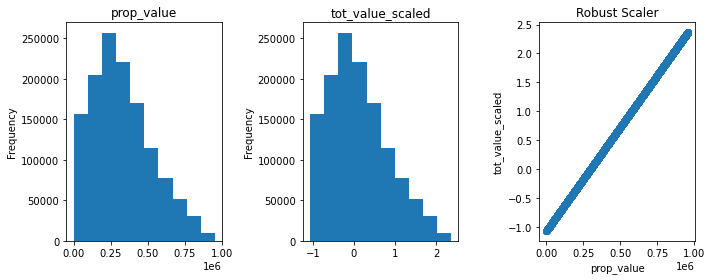

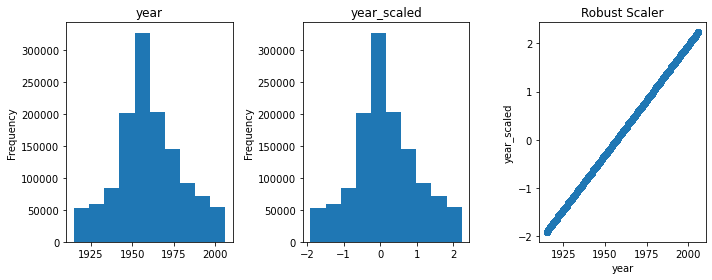

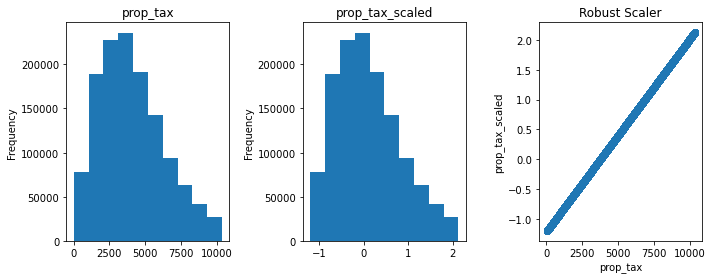

In [16]:
for i in np.arange((len(rob_train.drop(columns=['zip','zip_scaled']).columns))* 0.5):
    x = rob_train.columns[i]
    y = rob_train.columns[i + (len(rob_train.columns)* 0.5)]

    # Visualize the un-scaled and scaled distribution for all columns
    plt.figure(figsize=(10, 4))

    
    # subplot 1
    plt.subplot(131)
    rob_train[x].plot.hist(title=x)

    #subplot 2
    plt.subplot(132)
    rob_train[y].plot.hist(title=y)
    
    # Visualize the scaling:
    plt.subplot(133)
    plt.scatter(rob_train[x], rob_train[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Robust Scaler')
    plt.tight_layout()

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [17]:
# create min-max scaled df
mm_scaled = minmax_train[minmax_train.columns[7:]]

# use inverse_transform method
mm_scaler.inverse_transform(mm_scaled)

array([[3.00000e+00, 1.50000e+00, 1.16400e+03, ..., 1.95400e+03,
        3.84842e+03, 6.05900e+03],
       [3.00000e+00, 1.50000e+00, 1.08800e+03, ..., 1.95900e+03,
        3.58384e+03, 6.05900e+03],
       [3.00000e+00, 4.50000e+00, 3.24500e+03, ..., 1.98900e+03,
        9.45630e+03, 6.05900e+03],
       ...,
       [3.00000e+00, 1.00000e+00, 9.88000e+02, ..., 1.95200e+03,
        2.28386e+03, 6.03700e+03],
       [3.00000e+00, 3.00000e+00, 1.83000e+03, ..., 1.95000e+03,
        1.61882e+03, 6.03700e+03],
       [3.00000e+00, 2.00000e+00, 1.48300e+03, ..., 1.93300e+03,
        1.66398e+03, 6.03700e+03]])

In [18]:
unscaled_df = pd.DataFrame(mm_scaler.inverse_transform(mm_scaled), index = minmax_train.index, columns=[minmax_train.columns[:7]])
unscaled_df.head()

,bed,bath,sqft,prop_value,year,prop_tax,zip
643196,3.0,1.5,1164.0,313006.0,1954.0,3848.42,6059.0
1945521,3.0,1.5,1088.0,300950.0,1959.0,3583.84,6059.0
1097096,3.0,4.5,3245.0,794619.0,1989.0,9456.30,6059.0
712393,2.0,1.0,1836.0,310189.0,1948.0,3934.34,6037.0
848788,3.0,2.0,1428.0,467763.0,1971.0,5510.68,6059.0


In [19]:
train.head()

,bed,bath,sqft,prop_value,year,prop_tax,zip
643196,3,1.5,1164.0,313006.0,1954,3848.42,06059
1945521,3,1.5,1088.0,300950.0,1959,3583.84,06059
1097096,3,4.5,3245.0,794619.0,1989,9456.30,06059
712393,2,1.0,1836.0,310189.0,1948,3934.34,06037
848788,3,2.0,1428.0,467763.0,1971,5510.68,06059


**Takeaway**

Although the data has been descaled and the values match, the datatypes have been changed and don't accurately represent the original data.

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

**Non-linear Scaler**

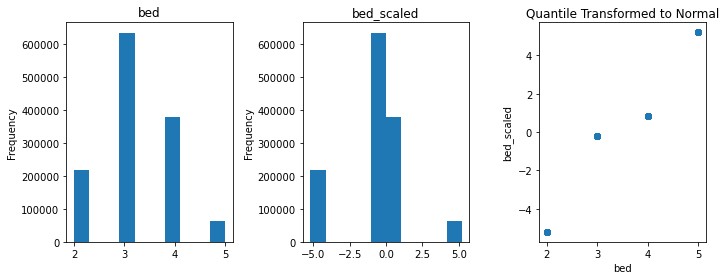

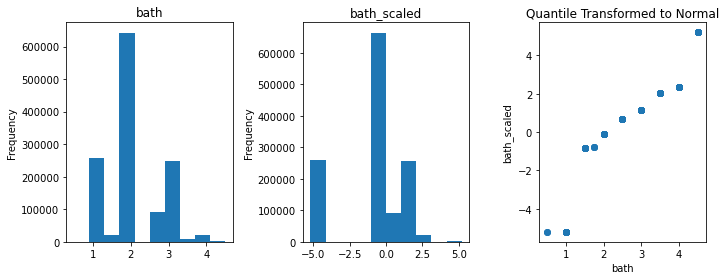

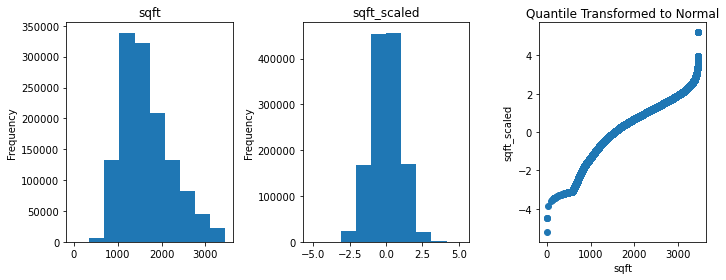

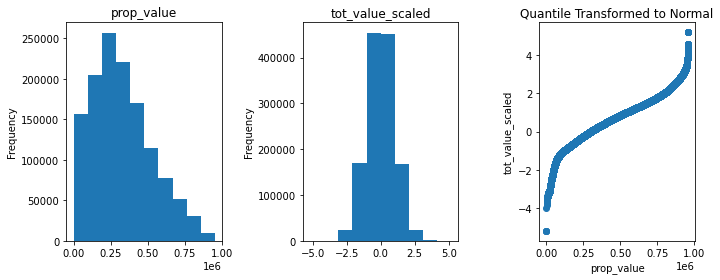

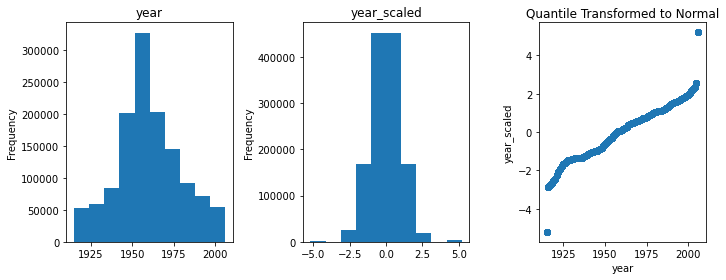

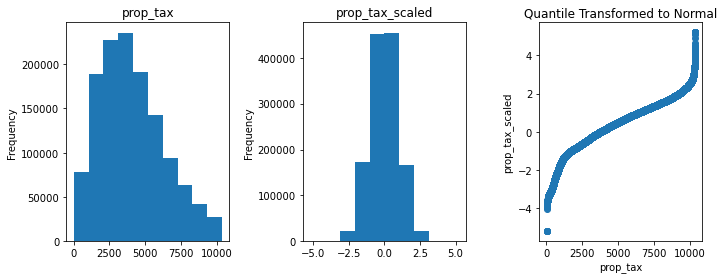

In [20]:
nonlin_train = train.copy()

# 1. create the object
nonlin_scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

# 2. fit the object
nonlin_scaler.fit(train)

# 3. use the object
nonlin_train[['bed_scaled', 'bath_scaled', 'sqft_scaled', 'tot_value_scaled', 'year_scaled', 'prop_tax_scaled', 'zip_scaled']] = nonlin_scaler.transform(train)

for i in np.arange((len(nonlin_train.drop(columns=['zip','zip_scaled']).columns))* 0.5):
    x = nonlin_train.columns[i]
    y = nonlin_train.columns[i + (len(nonlin_train.columns)* 0.5)]

    # Visualize the un-scaled and scaled distribution for all columns
    plt.figure(figsize=(10, 4))

    
    # subplot 1
    plt.subplot(131)
    nonlin_train[x].plot.hist(title=x)

    #subplot 2
    plt.subplot(132)
    nonlin_train[y].plot.hist(title=y)
    
    # Visualize the scaling:
    plt.subplot(133)
    plt.scatter(nonlin_train[x], nonlin_train[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Quantile Transformed to Normal')
    plt.tight_layout()

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [21]:
qt_train=train.copy()

In [22]:
# 1. create the object
qt_scaler = sklearn.preprocessing.QuantileTransformer()

# 2. fit the object
qt_scaler.fit(train)
qt_scaler

# 3. use the object
qt_train[['bed_scaled', 'bath_scaled', 'sqft_scaled', 'tot_value_scaled', 'year_scaled', 'prop_tax_scaled', 'zip_scaled']] = qt_scaler.transform(train)

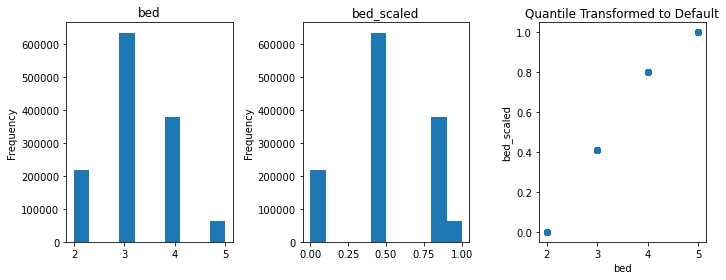

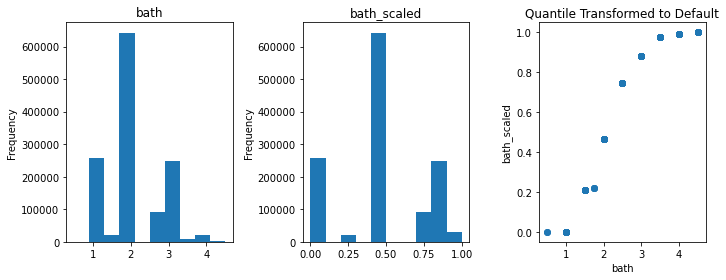

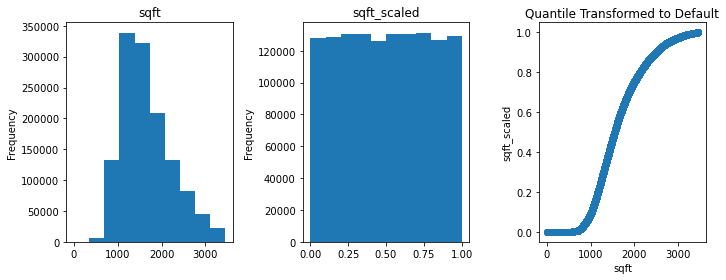

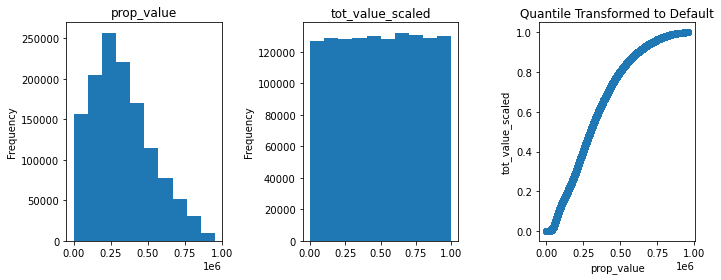

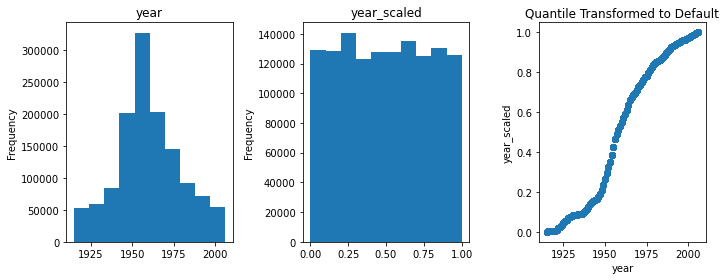

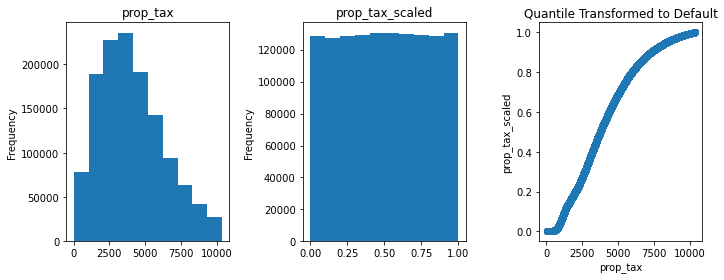

In [23]:
for i in np.arange((len(qt_train.drop(columns=['zip','zip_scaled']).columns))* 0.5):
    x = qt_train.columns[i]
    y = qt_train.columns[i + (len(qt_train.columns)* 0.5)]

    # Visualize the un-scaled and scaled distribution for all columns
    plt.figure(figsize=(10, 4))

    
    # subplot 1
    plt.subplot(131)
    qt_train[x].plot.hist(title=x)

    #subplot 2
    plt.subplot(132)
    qt_train[y].plot.hist(title=y)
    
    # Visualize the scaling:
    plt.subplot(133)
    plt.scatter(qt_train[x], qt_train[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Quantile Transformed to Default')
    plt.tight_layout()
    

As the documentation suggests, with output_distribution set to normal, the scaled data will represent a more normally distributed set. While the uniform option return a more uniformally distrubted set.

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!